<a href="https://colab.research.google.com/github/ArtyomHov/tensorflow-zero-to-mastery/blob/master/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks inTensorFlow
There are many definitions for regressions model but in our case, we are going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


### Creating a data to view and fit

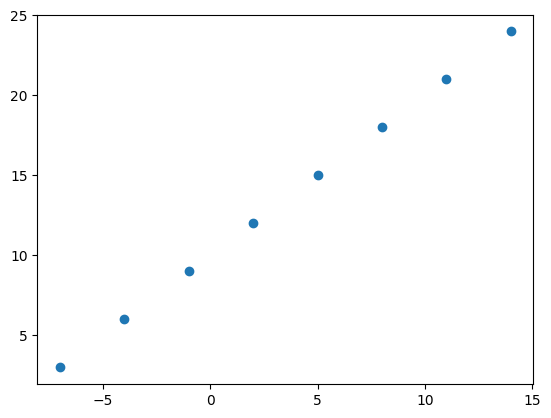

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == 10 + X

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0].ndim

0

In [7]:
X[0], y[0]

(-7.0, 3.0)

In [8]:
# Turn our numpy arrays into tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

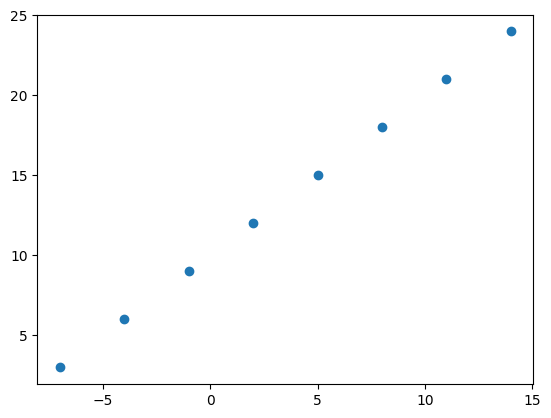

In [10]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics = ["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 520ms/step - loss: 21.7769 - mae: 21.7769
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 21.3838 - mae: 21.3838
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 20.9907 - mae: 20.9907
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 20.5976 - mae: 20.5976
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 20.2651 - mae: 20.2651


In [12]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# Try to make prediction using our model
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 92ms/step


array([[-23.463293]], dtype=float32)

## Improving model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave for training longer) or on more data (give the model more examples to learn)

In [16]:
# Let'srebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis = -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 542ms/step - loss: 9.6930 - mae: 9.6930
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 9.5605 - mae: 9.5605
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4280 - mae: 9.4280
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 9.2955 - mae: 9.2955
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 9.1630 - mae: 9.1630
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 9.0305 - mae: 9.0305
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 8.8980 - mae: 8.8980
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7655 - mae: 8.7655
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 8.6330 - mae: 8.6330
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 8.5005 - mae: 8.5005
Epoch 11/100
1/1 [==============================] - 0s 27ms/step - loss

In [18]:
# Remind ourselves of the data

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has inproved

model.predict([17.0])

1/1 [==============================] - 0s 62ms/step


array([[29.996084]], dtype=float32)

In [39]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 12.9562 - mae: 12.9562
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2761 - mae: 12.2761
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.5885 - mae: 11.5885
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8908 - mae: 10.8908
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 10.1807 - mae: 10.1807
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.4567 - mae: 9.4567
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 8.7167 - mae: 8.7167
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9581 - mae: 7.9581
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.1781 - mae: 7.1781
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8061 - mae: 6.8061
Epoch 11/100
1/1 [==============================] - 0s 14m

In [34]:
# Let's remind ourselves about the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [40]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 75ms/step


array([[27.402987]], dtype=float32)

## Evaluating a model